In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()

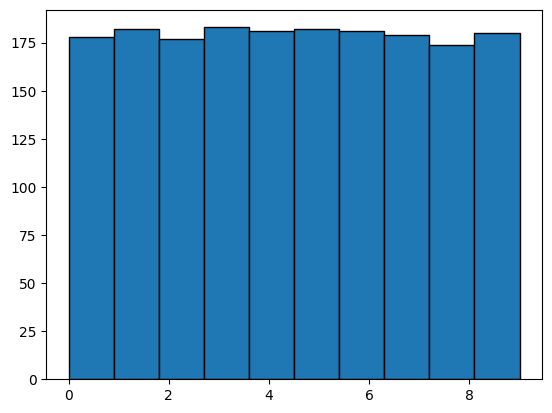

In [2]:
plt.hist(digits['target'], edgecolor='black')
plt.show()

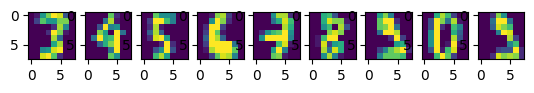

In [3]:
images = digits["data"][23:32]

fig, axes = plt.subplots(nrows=1, ncols=len(images))

for axe, image in zip(axes, images):
    axe.imshow(image.reshape(8, 8))

In [4]:
from sklearn.model_selection import train_test_split

X = digits["data"]
y = digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.manifold import TSNE

TSNE = TSNE(n_components = 2, random_state=21)

X_tsne = TSNE.fit_transform(X_train)

X_tsne
# Notice that the length of arrays fell from 64 to 2

AttributeError: 'TSNE' object has no attribute 'transform'

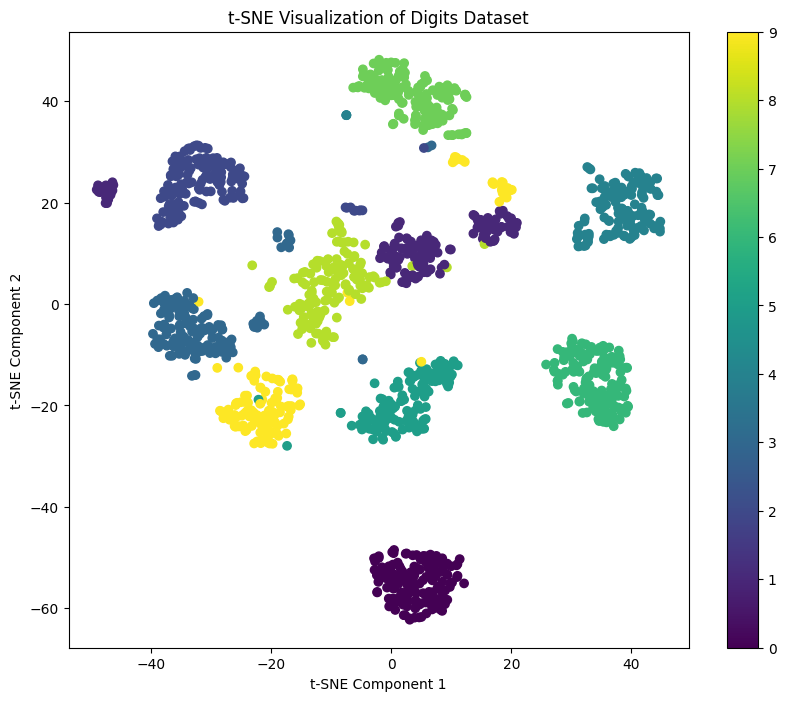

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Digits Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()  

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {
    "C": np.logspace(-2, 4, num=7),
    "gamma": np.logspace(-3, 2, num=6)
}
svr = svm.SVR()
grid = GridSearchCV(svr, param_grid=param_grid, scoring="neg_mean_absolute_error")

In [14]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             scoring='neg_mean_absolute_error')